In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

conn_str = (
    "mssql+pyodbc://DESKTOP-J366DLJ\\SQLSERVER/LeS_SalesOrder?driver=ODBC+Driver+17+for+SQL+Server"
)

engine = create_engine(conn_str)

query_vendor = "SELECT * FROM SM_QUOTATIONS_VENDOR"
query_detail = "SELECT * FROM SM_QUOTATIONDETAIL_VENDOR"

### LOAD DATASET

In [2]:
df_vendor = pd.read_sql(query_vendor, engine)
df_detail = pd.read_sql(query_detail, engine)
pd.set_option('display.max_columns', None)

In [3]:
df_vendor.head()

,QUOTATIONID,DOC_XML,DOCID,DOC_TYPE,VRNO,BUYER_VRNO,SUPPLIER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,RFQ_SENT_DATE,QUOTE_RECVD_DATE,CURRENCYID,CURR_CODE,QUOTE_AMOUNT,QUOTE_EXCHRATE,ITEM_TOTAL,OTHERCOSTS,FREIGHTAMT,PAYMENT_TERMS,QUOTE_DISCOUNT,ADDITIONAL_DISC,ADD_DISC_TYPE,QUOTE_VALIDITY,QUOTE_REMARKS,UPDATE_DATE,DELIVERYTIME,PAYLOADID,CREATED_DATE,SITEID,SENT_BY,PORT_CODE,PORT_NAME,QUOTE_APPROVEDDATE,DELIVERYDAYS,QUOTE_SUBMIT_BY,QUOTE_REFERENCE,REPLY_BY_DATE,QUOTE_SUBMIT_DATE,VENDOR_STATUS,CHANGED_BY_VENDOR,LATEDATE,RFQ_ACK_DATE,PO_ACK_DATE,POC_REFERENCE,PODATE,POC_DATE,POC_BY,BUYER_REMARKS,VESSEL_NAME,VESSEL_IDNO,VESSEL_OWNER,VESSEL_OWNER_CODE,EXPORTED,VERSION,RFQ_EXPORT,QUOTE_FILE_REF,PRINT_STATUS,QUOTE_FILE_STAMP,DELIVERY_PROMISED,GENERAL_TERMS,PAY_TERMS,TAX_PERCNT,QUOTE_VERSION,IS_DECLINED,QUOTE_SUBJECT,SP_MAS_REMARK,BYR_SUPP_LINKID,ATTACHMENT1,ATTACHMENT2,ALLOWANCE,UDF1,UDF2,UDF3,RevisionNumber,LINK_RECORDID,TRANSPORT_MODE,OrderHandling,OrderType,OriginatingRequestNo,ShipComplete,SupplierORGRef,UpdType,ContractType,OrgSystemRef,OTHER_COST2,OTHER_COST3,VESSEL_ETA,VESSEL_ETD,LOCATION,ATTENTION_REMARK,BUYER_LINK_CODE,VENDOR_LINK_CODE,BUYER_SENDER,BUYER_RECIPIENT,EXPORTED_DATE,DEPARTMENT,TAX_AMOUNT,COST_AMOUNT1,COST_AMOUNT2
0,10248668,MTML,61FD838F-B8CD-44AD-9E5E-D4A30D10B080,RequestForQuote,D0406-ADX/001566466V1,D0406,D0406/1566466V1,4001051.0,1110018.0,None,NaT,NaN,None,0.0,NaN,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2015-07-10 13:07:01.887,NaT,None,NaT,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,This Request For Quotation is sent for and on ...,YUTAI BREEZE,9541631,Wallem Shipmanagement HK Limited,SM0018,0.0,1,0.0,None,0.0,None,NaT,None,None,NaN,NaN,0,None,None,100338.0,None,None,NaN,None,None,None,None,10248677.0,None,None,None,None,None,None,None,None,None,NaN,NaN,2021-09-21 02:40:30,2021-09-22,None,None,None,None,None,None,NaT,None,NaN,None,None
1,11434115,MTML,7E029258-1430-4662-B295-474F36EA93D6,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,None,4001020.0,5001551.0,None,2018-12-31 00:48:22.140,NaN,None,0.0,NaN,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2018-12-31 00:53:11.667,NaT,None,2018-12-31 00:48:22.140,None,None,nil,None,None,NaN,NaN,None,NaT,NaT,1,None,NaT,NaT,NaT,None,NaT,NaT,NaN,None,DKON - D AND K I,None,SYNERGY MARITIME PVT LTD,SM0637,0.0,1,0.0,181231_003626478.msg,0.0,None,NaT,None,None,NaN,NaN,0,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,None,104203.0,None,None,NaN,None,None,None,None,0.0,None,None,None,None,None,None,None,None,None,0.0,0.0,NaT,NaT,None,None,None,None,None,None,NaT,None,NaN,None,None
2,11434116,MTML,CBAA9477-E233-469E-AE9A-D63D6D16BCEB,RequestForQuote,4394-00782,4394-00782,None,5000264.0,2000105.0,None,2018-12-31 01:03:22.120,10000002.0,EUR,0.0,1.4177,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2018-12-31 16:11:06.787,NaT,None,2018-12-31 01:03:22.120,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,"Expected Port of Delivery: Amsterdam - NLD,NLAMS",BW CLYDE,9269245,V.Ships Asia Group Pte Ltd,SM0036,0.0,1,0.0,None,0.0,None,NaT,"V.Ships Asia Group Pte Ltd, As Managers and Ag...",None,NaN,NaN,0,URGENT FIRE HOSES,None,103438.0,None,None,NaN,None,None,None,None,11434504.0,None,None,None,None,None,None,None,None,None,0.0,0.0,NaT,NaT,None,None,None,None,None,None,NaT,None,NaN,None,None
3,11434117,MTML,06D6642F-B1B9-4A3D-A10A-1A6092260A54,RequestForQuote,4394-00784,4394-00784,None,5000264.0,2000105.0,None,2018-12-31 01:03:24.643,10000002.0,EUR,0.0,1.4177,0.0,0.0,0.0,None,0.0,NaN,None,NaT,None,2019-01-02 19:23:26.720,NaT,None,2018-12-31 01:03:24.643,None,None,None,None,None,NaN,NaN,None,NaT,NaT,8,None,NaT,NaT,NaT,None,NaT,NaT,NaN,"Expected Port of Delivery: Amsterdam - NLD,NLA...",BW CLYDE,9269245,V.Ships Asia Group Pte Ltd,SM0036,0.0,1,0.0,None,0.0,None,NaT,"V.Ships Asia Group Pte Ltd, As Managers and Ag...",None,NaN,NaN,0,SERVICING OF GAS INSTRUMENT RX-517,None,103438.0,None,None,NaN,None,None,None,None,11436110.0,None,None,N

In [4]:
df_detail.head()

,QUOTATIONDETAILID,QUOTATIONID,ITEMSTATUS,ITEMNO,VENDOR_ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,QUOTE_EXCHRATE,DISCOUNT,DELIVERYTIME,PARTNAME,DRAWINGNO,POSNO,REFNO,UNIT_CODE,EQUIP_NAME,EQUIP_MAKER,EQUIP_TYPE,EQUIP_SERNO,EQUIP_REMARKS,QUOTEITEM_REMARK,ITEM_REMARK,UPDATE_DATE,CREATED_DATE,CHANGED_BY_VENDOR,SITEID,DOCITEMID,QUOTE_FILE,VENDOR_REFNO,ORIGINATINGSYSTEMREF,ITEM_MARKED_REMARK,SYS_ITEMNO,BUYER_UNIT_CODE,ITEM_TYPE,LINK_RECORD_ID,UDF1,UDF2,UDF3,SupplierORGRef,VENDOR_ITEMNAME,BuyerORGRef,REFERENCE_NO,ExternalItemNumber,IMPA,ISSA,ITEM_PACKET_SIZE,DEPARTMENT,TAX_AMOUNT,BYR_ORIGINATINGSYSTEMREF,Buyer_Price,EQUIP_MODEL,IsHazardous
0,23596588,11879966.0,1,1.0,1,3.0,3.0,0.0,1360.0,1.0,70.0,0.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",None,None,"M0248,WITH MSDS",PCS,None,None,None,None,None,None,Item Code WC4-0592,2021-08-20 15:10:02.220,2021-08-20 15:10:02.220,NaN,None,1E42D479-46CD-493D-B62B-10C6ABCB5DEF,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,777067,23596056,None,1.0,PCS,None,23596056.0,None,None,None,None,NITRITE FULL KIT MO248A,None,None,None,None,None,None,None,61.20,None,NaN,None,NaN
1,23596589,11879966.0,1,2.0,2,2.0,50.0,0.0,45.1,1.0,65.0,0.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",None,None,571687,LTR,None,None,None,None,None,None,Item Code WC4-0959A,2021-08-20 15:10:02.250,2021-08-20 15:10:02.250,NaN,None,74D8CA56-F9C7-45C9-87C5-5670537696C0,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,571687,23596057,None,2.0,PAL,None,23596057.0,None,None,None,None,DISCLEAN 25 LTR,None,None,None,None,None,None,None,39.46,None,NaN,None,NaN
2,23596590,11879966.0,1,3.0,3,1.0,25.0,0.0,42.9,1.0,55.0,0.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",None,None,"571380,25 LITER PALE",LTR,None,None,None,None,None,None,Item Code XCON-05-0048,2021-08-20 15:10:02.280,2021-08-20 15:10:02.280,NaN,None,1220C08E-6EB0-47C4-9943-0F632A449565,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,765018,23596058,None,3.0,PCS,None,23596058.0,None,None,None,None,ENVIROCLEAN 25 LTR,None,None,None,None,None,None,None,24.13,None,NaN,None,NaN
3,23596591,11879966.0,1,4.0,4,4.0,100.0,0.0,42.9,1.0,55.0,0.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",None,None,"571380,25 LITER PALE",LTR,None,None,None,None,None,None,Item Code XCON-05-0048,2021-08-20 15:10:02.303,2021-08-20 15:10:02.303,NaN,None,080F4B01-9D3E-41CA-A2DA-37FEF6838FEB,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,765018,23596059,None,4.0,PCS,None,23596059.0,None,None,None,None,ENVIROCLEAN 25 LTR,None,None,None,None,None,None,None,96.53,None,NaN,None,NaN
4,23596592,11879966.0,1,5.0,5,1.0,1.0,0.0,235.0,1.0,42.0,0.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",None,None,"778853, PACKING SIZE: 12PCS CARTON X 250ML BOT...",PCS,None,None,None,None,None,None,Item Code XCHE-01-0047,2021-08-20 15:10:02.333,2021-08-20 15:10:02.333,NaN,None,977A669C-2F85-4751-9B83-8BC26C7B44E4,6e029d00-9578-4ba0-b0e4-81bf84df8c07_T1_214108...,778853,23596060,None,5.0,CRT,None,23596060.0,None,None,None,None,EASYCLEAN LIQUID HAND SOAP(12 x 0.25ltr in box),None,None,None,None,None,None,None,6.82,None,NaN,None,NaN


### DF_VENDOR DATAFRAME

In [5]:
df_vendor.shape

(443705, 99)

In [6]:
df_vendor.dtypes

QUOTATIONID               int64
DOC_XML                  object
DOCID                    object
DOC_TYPE                 object
VRNO                     object
                      ...      
EXPORTED_DATE    datetime64[ns]
DEPARTMENT               object
TAX_AMOUNT              float64
COST_AMOUNT1             object
COST_AMOUNT2             object
Length: 99, dtype: object

#### EDA OF DF_VENDOR

In [7]:
nan_columns = df_vendor.columns[df_vendor.isna().all()].tolist()      # list of all columns having null values
nan_columns

['RFQ_SENT_DATE',
 'PAYMENT_TERMS',
 'ADD_DISC_TYPE',
 'PAYLOADID',
 'SITEID',
 'SENT_BY',
 'QUOTE_APPROVEDDATE',
 'CHANGED_BY_VENDOR',
 'SP_MAS_REMARK',
 'ShipComplete',
 'UpdType',
 'ContractType',
 'BUYER_LINK_CODE',
 'VENDOR_LINK_CODE',
 'BUYER_RECIPIENT',
 'DEPARTMENT',
 'COST_AMOUNT1',
 'COST_AMOUNT2']

In [8]:
drop_1 = ['RFQ_SENT_DATE','PAYMENT_TERMS','ADD_DISC_TYPE','PAYLOADID','SITEID','SENT_BY','QUOTE_APPROVEDDATE','CHANGED_BY_VENDOR','SP_MAS_REMARK','ShipComplete',
          'UpdType','ContractType', 'BUYER_LINK_CODE', 'VENDOR_LINK_CODE', 'BUYER_RECIPIENT', 'DEPARTMENT','COST_AMOUNT1', 'COST_AMOUNT2', 'DOCID', 'CURRENCYID',
          'QUOTE_REMARKS', 'QUOTE_SUBMIT_BY', 'QUOTE_REFERENCE', 'BUYER_REMARKS', 'VESSEL_IDNO', 'VESSEL_OWNER_CODE', 'QUOTE_FILE_REF', 'PRINT_STATUS',
          'QUOTE_FILE_STAMP', 'DELIVERY_PROMISED', 'GENERAL_TERMS', 'PAY_TERMS', 'TAX_PERCNT', 'QUOTE_VERSION', 'ATTACHMENT1', 'ATTACHMENT2', 'ALLOWANCE', 'UDF1',
          'UDF2', 'UDF3', 'RevisionNumber', 'LINK_RECORDID', 'ATTENTION_REMARK', 'VESSEL_ETD', 'VESSEL_ETA', 'OrgSystemRef', 'SupplierORGRef', 'OriginatingRequestNo']
df_vendor = df_vendor.drop(columns=drop_1, axis='columns')
df_vendor.head(10)

,QUOTATIONID,DOC_XML,DOC_TYPE,VRNO,BUYER_VRNO,SUPPLIER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_AMOUNT,QUOTE_EXCHRATE,ITEM_TOTAL,OTHERCOSTS,FREIGHTAMT,QUOTE_DISCOUNT,ADDITIONAL_DISC,QUOTE_VALIDITY,UPDATE_DATE,DELIVERYTIME,CREATED_DATE,PORT_CODE,PORT_NAME,DELIVERYDAYS,REPLY_BY_DATE,QUOTE_SUBMIT_DATE,VENDOR_STATUS,LATEDATE,RFQ_ACK_DATE,PO_ACK_DATE,POC_REFERENCE,PODATE,POC_DATE,POC_BY,VESSEL_NAME,VESSEL_OWNER,EXPORTED,VERSION,RFQ_EXPORT,IS_DECLINED,QUOTE_SUBJECT,BYR_SUPP_LINKID,TRANSPORT_MODE,OrderHandling,OrderType,OTHER_COST2,OTHER_COST3,LOCATION,BUYER_SENDER,EXPORTED_DATE,TAX_AMOUNT
0,10248668,MTML,RequestForQuote,D0406-ADX/001566466V1,D0406,D0406/1566466V1,4001051.0,1110018.0,NaT,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaT,2015-07-10 13:07:01.887,NaT,NaT,None,None,NaN,NaT,NaT,8,NaT,NaT,NaT,None,NaT,NaT,NaN,YUTAI BREEZE,Wallem Shipmanagement HK Limited,0.0,1,0.0,0,None,100338.0,None,None,None,NaN,NaN,None,None,NaT,NaN
1,11434115,MTML,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,None,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 00:53:11.667,NaT,2018-12-31 00:48:22.140,nil,None,NaN,NaT,NaT,1,NaT,NaT,NaT,None,NaT,NaT,NaN,DKON - D AND K I,SYNERGY MARITIME PVT LTD,0.0,1,0.0,0,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,104203.0,None,None,None,0.0,0.0,None,None,NaT,NaN
2,11434116,MTML,RequestForQuote,4394-00782,4394-00782,None,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 16:11:06.787,NaT,2018-12-31 01:03:22.120,None,None,NaN,NaT,NaT,8,NaT,NaT,NaT,None,NaT,NaT,NaN,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT FIRE HOSES,103438.0,None,None,None,0.0,0.0,None,None,NaT,NaN
3,11434117,MTML,RequestForQuote,4394-00784,4394-00784,None,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,NaT,2019-01-02 19:23:26.720,NaT,2018-12-31 01:03:24.643,None,None,NaN,NaT,NaT,8,NaT,NaT,NaT,None,NaT,NaT,NaN,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,SERVICING OF GAS INSTRUMENT RX-517,103438.0,None,None,None,0.0,0.0,None,None,NaT,NaN
4,11434118,MTML,RequestForQuote,4394-00783,4394-00783,None,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,0.0,1.0000,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 01:13:30.337,NaT,2018-12-31 01:03:27.133,NLRTM,Rotterdam,NaN,NaT,NaT,2,NaT,2018-12-31 01:13:35.493,NaT,None,NaT,NaT,NaN,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT SPAN GAS & OTHERS,102029.0,None,None,None,0.0,0.0,None,None,NaT,NaN
5,11434119,MTML,RequestForQuote,168-307-2-2018-B,168-307-2-2018-B,None,5000130.0,5000725.0,2018-12-31 01:43:22.067,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 01:49:11.780,NaT,2018-12-31 01:43:22.067,BEANR,ANTWERPEN,NaN,2019-01-02,NaT,1,2019-01-15,NaT,NaT,None,NaT,NaT,NaN,M/T STOLT SEA,Stolt Tankers BV,0.0,1,0.0,0,None,102190.0,None,None,None,0.0,0.0,None,None,NaT,NaN
6,11434120,MTML,RequestForQuote,168-308-2-2018-B,168-308-2-2018-B,None,5000130.0,5000725.0,2018-12-31 01:43:25.770,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 01:49:12.050,NaT,2018-12-31 01:43:25.770,BEANR,ANTWERPEN,NaN,2019-01-02,NaT,1,2019-01-15,NaT,NaT,None,NaT,NaT,NaN,M/T STOLT SEA,Stolt Tankers BV,0.0,1,0.0,0,None,102190.0,None,None,None,0.0,0.0,None,None,NaT,NaN
7,11434121,MTML,RequestForQuote,50518-A021-1,50518-A021-1,None,5000264.0,5000183.0,2018-12-31 01:43:29.117,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 21:15:10.647,NaT,2018-12-31 01:43:29.117,None,None,NaN,NaT,NaT,8,NaT,NaT,NaT,None,NaT,NaT,NaN,CHEM HOUSTON,ASM MARITIME BV,0.0,1,0.0,0,IMPA/O CATALOG,103134.0,None,None,None,0.0,0.0,None,None,NaT,NaN
8,11434122,MTML,RequestForQuote,50518-A019-1,50518-A019-1,None,5000264.0,5000183.0,2018-12-31 01:53:22.077,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaT,2018-12-31 19:15:07.953,NaT,2018-12-31 01:53:22.077,None,None,NaN,NaT,NaT,8,NaT,NaT,NaT,None,NaT,NaT,NaN,CHEM HOUSTON,ASM MARITIME BV,0.0,1,0.0,0,IMPA/O CATALOG,103134.0,None,None,None,0.0,0.0,None,None,NaT,NaN
9,11434123,MTML,RequestForQuote

In [9]:
null_counts = df_vendor.isnull().sum()
print(null_counts)

QUOTATIONID               0
DOC_XML                   0
DOC_TYPE                  0
VRNO                      2
BUYER_VRNO            11121
SUPPLIER_VRNO        394242
QUOTE_ADDRESSID           6
BUYER_ADDRESSID           6
QUOTE_RECVD_DATE          1
CURR_CODE            110579
QUOTE_AMOUNT             18
QUOTE_EXCHRATE       174568
ITEM_TOTAL               18
OTHERCOSTS                0
FREIGHTAMT                0
QUOTE_DISCOUNT            0
ADDITIONAL_DISC      230297
QUOTE_VALIDITY       360497
UPDATE_DATE               0
DELIVERYTIME         311791
CREATED_DATE              1
PORT_CODE            237180
PORT_NAME            270519
DELIVERYDAYS         200391
REPLY_BY_DATE        429066
QUOTE_SUBMIT_DATE    302211
VENDOR_STATUS             0
LATEDATE             266258
RFQ_ACK_DATE         239453
PO_ACK_DATE          375741
POC_REFERENCE        408564
PODATE               340284
POC_DATE             408493
POC_BY               437278
VESSEL_NAME           17754
VESSEL_OWNER        

In [10]:
drop_2 = ['SUPPLIER_VRNO', 'QUOTE_VALIDITY', 'DELIVERYTIME', 'REPLY_BY_DATE', 'QUOTE_SUBMIT_DATE', 'PO_ACK_DATE', 'POC_REFERENCE', 'PODATE',
          'POC_DATE', 'POC_BY', 'TRANSPORT_MODE', 'OrderHandling', 'OrderType', 'LOCATION', 'BUYER_SENDER', 'EXPORTED_DATE', 'TAX_AMOUNT']
df_vendor = df_vendor.drop(columns=drop_2, axis='columns')
df_vendor.head(6)

,QUOTATIONID,DOC_XML,DOC_TYPE,VRNO,BUYER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_AMOUNT,QUOTE_EXCHRATE,ITEM_TOTAL,OTHERCOSTS,FREIGHTAMT,QUOTE_DISCOUNT,ADDITIONAL_DISC,UPDATE_DATE,CREATED_DATE,PORT_CODE,PORT_NAME,DELIVERYDAYS,VENDOR_STATUS,LATEDATE,RFQ_ACK_DATE,VESSEL_NAME,VESSEL_OWNER,EXPORTED,VERSION,RFQ_EXPORT,IS_DECLINED,QUOTE_SUBJECT,BYR_SUPP_LINKID,OTHER_COST2,OTHER_COST3
0,10248668,MTML,RequestForQuote,D0406-ADX/001566466V1,D0406,4001051.0,1110018.0,NaT,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2015-07-10 13:07:01.887,NaT,None,None,NaN,8,NaT,NaT,YUTAI BREEZE,Wallem Shipmanagement HK Limited,0.0,1,0.0,0,None,100338.0,NaN,NaN
1,11434115,MTML,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2018-12-31 00:53:11.667,2018-12-31 00:48:22.140,nil,None,NaN,1,NaT,NaT,DKON - D AND K I,SYNERGY MARITIME PVT LTD,0.0,1,0.0,0,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,104203.0,0.0,0.0
2,11434116,MTML,RequestForQuote,4394-00782,4394-00782,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,2018-12-31 16:11:06.787,2018-12-31 01:03:22.120,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT FIRE HOSES,103438.0,0.0,0.0
3,11434117,MTML,RequestForQuote,4394-00784,4394-00784,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,2019-01-02 19:23:26.720,2018-12-31 01:03:24.643,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,SERVICING OF GAS INSTRUMENT RX-517,103438.0,0.0,0.0
4,11434118,MTML,RequestForQuote,4394-00783,4394-00783,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,0.0,1.0000,0.0,0.0,0.0,0.0,NaN,2018-12-31 01:13:30.337,2018-12-31 01:03:27.133,NLRTM,Rotterdam,NaN,2,NaT,2018-12-31 01:13:35.493,BW CLYDE,V.Ships Asia Group Pte Ltd,0.0,1,0.0,0,URGENT SPAN GAS & OTHERS,102029.0,0.0,0.0
5,11434119,MTML,RequestForQuote,168-307-2-2018-B,168-307-2-2018-B,5000130.0,5000725.0,2018-12-31 01:43:22.067,EUR,0.0,1.4177,0.0,0.0,0.0,0.0,NaN,2018-12-31 01:49:11.780,2018-12-31 01:43:22.067,BEANR,ANTWERPEN,NaN,1,2019-01-15,NaT,M/T STOLT SEA,Stolt Tankers BV,0.0,1,0.0,0,None,102190.0,0.0,0.0


In [11]:
zero_columns = df_vendor.columns[(df_vendor.eq(0) | df_vendor.eq(0.0)).any()].tolist()
sum_of_zeros = df_vendor[zero_columns].eq(0) | df_vendor[zero_columns].eq(0.0)
sum_of_zeros_count = sum_of_zeros.sum()
print(sum_of_zeros_count)

QUOTE_AMOUNT       220840
ITEM_TOTAL         276283
OTHERCOSTS         438197
FREIGHTAMT         432495
QUOTE_DISCOUNT     443705
ADDITIONAL_DISC    212748
DELIVERYDAYS       138903
EXPORTED           443396
RFQ_EXPORT         399487
IS_DECLINED        438718
OTHER_COST2        441564
OTHER_COST3        438589
dtype: int64


In [12]:
drop_3 = ['OTHERCOSTS', 'FREIGHTAMT', 'QUOTE_DISCOUNT', 'QUOTE_AMOUNT', 'ADDITIONAL_DISC', 'OTHER_COST3', 'OTHER_COST2', 'IS_DECLINED', 'RFQ_EXPORT',
          'EXPORTED']
df_vendor = df_vendor.drop(columns=drop_3, axis='columns')
df_vendor.head(6)

,QUOTATIONID,DOC_XML,DOC_TYPE,VRNO,BUYER_VRNO,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,ITEM_TOTAL,UPDATE_DATE,CREATED_DATE,PORT_CODE,PORT_NAME,DELIVERYDAYS,VENDOR_STATUS,LATEDATE,RFQ_ACK_DATE,VESSEL_NAME,VESSEL_OWNER,VERSION,QUOTE_SUBJECT,BYR_SUPP_LINKID
0,10248668,MTML,RequestForQuote,D0406-ADX/001566466V1,D0406,4001051.0,1110018.0,NaT,None,NaN,0.0,2015-07-10 13:07:01.887,NaT,None,None,NaN,8,NaT,NaT,YUTAI BREEZE,Wallem Shipmanagement HK Limited,1,None,100338.0
1,11434115,MTML,RequestForQuote,SPR/DKON/D/18/085,SPR/DKON/D/18/085,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,NaN,0.0,2018-12-31 00:53:11.667,2018-12-31 00:48:22.140,nil,None,NaN,1,NaT,NaT,DKON - D AND K I,SYNERGY MARITIME PVT LTD,1,DD REQUIREMENTS- BALLAST VENT HEADS WITH CLASS...,104203.0
2,11434116,MTML,RequestForQuote,4394-00782,4394-00782,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,1.4177,0.0,2018-12-31 16:11:06.787,2018-12-31 01:03:22.120,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,1,URGENT FIRE HOSES,103438.0
3,11434117,MTML,RequestForQuote,4394-00784,4394-00784,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,1.4177,0.0,2019-01-02 19:23:26.720,2018-12-31 01:03:24.643,None,None,NaN,8,NaT,NaT,BW CLYDE,V.Ships Asia Group Pte Ltd,1,SERVICING OF GAS INSTRUMENT RX-517,103438.0
4,11434118,MTML,RequestForQuote,4394-00783,4394-00783,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,1.0000,0.0,2018-12-31 01:13:30.337,2018-12-31 01:03:27.133,NLRTM,Rotterdam,NaN,2,NaT,2018-12-31 01:13:35.493,BW CLYDE,V.Ships Asia Group Pte Ltd,1,URGENT SPAN GAS & OTHERS,102029.0
5,11434119,MTML,RequestForQuote,168-307-2-2018-B,168-307-2-2018-B,5000130.0,5000725.0,2018-12-31 01:43:22.067,EUR,1.4177,0.0,2018-12-31 01:49:11.780,2018-12-31 01:43:22.067,BEANR,ANTWERPEN,NaN,1,2019-01-15,NaT,M/T STOLT SEA,Stolt Tankers BV,1,None,102190.0


In [13]:
drop_4 = ['DOC_XML', 'BUYER_VRNO', 'BYR_SUPP_LINKID','VERSION','LATEDATE','PORT_NAME','VESSEL_NAME','VENDOR_STATUS','DELIVERYDAYS','PORT_CODE',
          'ITEM_TOTAL','VRNO','UPDATE_DATE','RFQ_ACK_DATE','QUOTE_SUBJECT']
df_vendor = df_vendor.drop(columns=drop_4, axis='columns')
df_vendor.head(6)

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,CREATED_DATE,VESSEL_OWNER
0,10248668,RequestForQuote,4001051.0,1110018.0,NaT,None,NaN,NaT,Wallem Shipmanagement HK Limited
1,11434115,RequestForQuote,4001020.0,5001551.0,2018-12-31 00:48:22.140,None,NaN,2018-12-31 00:48:22.140,SYNERGY MARITIME PVT LTD
2,11434116,RequestForQuote,5000264.0,2000105.0,2018-12-31 01:03:22.120,EUR,1.4177,2018-12-31 01:03:22.120,V.Ships Asia Group Pte Ltd
3,11434117,RequestForQuote,5000264.0,2000105.0,2018-12-31 01:03:24.643,EUR,1.4177,2018-12-31 01:03:24.643,V.Ships Asia Group Pte Ltd
4,11434118,RequestForQuote,4001051.0,2000105.0,2018-12-31 01:03:27.133,USD,1.0000,2018-12-31 01:03:27.133,V.Ships Asia Group Pte Ltd
5,11434119,RequestForQuote,5000130.0,5000725.0,2018-12-31 01:43:22.067,EUR,1.4177,2018-12-31 01:43:22.067,Stolt Tankers BV


In [14]:
df_vendor.dtypes

QUOTATIONID                  int64
DOC_TYPE                    object
QUOTE_ADDRESSID            float64
BUYER_ADDRESSID            float64
QUOTE_RECVD_DATE    datetime64[ns]
CURR_CODE                   object
QUOTE_EXCHRATE             float64
CREATED_DATE        datetime64[ns]
VESSEL_OWNER                object
dtype: object

In [15]:
df_vendor[['QUOTE_ADDRESSID', 'BUYER_ADDRESSID']] = df_vendor[['QUOTE_ADDRESSID', 'BUYER_ADDRESSID']].fillna(-1).astype(np.int64)

In [16]:
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,CREATED_DATE,VESSEL_OWNER
0,10248668,RequestForQuote,4001051,1110018,NaT,None,NaN,NaT,Wallem Shipmanagement HK Limited
1,11434115,RequestForQuote,4001020,5001551,2018-12-31 00:48:22.140,None,NaN,2018-12-31 00:48:22.140,SYNERGY MARITIME PVT LTD
2,11434116,RequestForQuote,5000264,2000105,2018-12-31 01:03:22.120,EUR,1.4177,2018-12-31 01:03:22.120,V.Ships Asia Group Pte Ltd
3,11434117,RequestForQuote,5000264,2000105,2018-12-31 01:03:24.643,EUR,1.4177,2018-12-31 01:03:24.643,V.Ships Asia Group Pte Ltd
4,11434118,RequestForQuote,4001051,2000105,2018-12-31 01:03:27.133,USD,1.0000,2018-12-31 01:03:27.133,V.Ships Asia Group Pte Ltd


#### DATE AND TIME FORMATTING

In [17]:
df_vendor['CREATED_DATE'] = df_vendor['CREATED_DATE'].replace('', np.nan)
df_vendor.dropna(subset=['CREATED_DATE'], inplace=True)

In [18]:
df_vendor['CREATE_DATE'] = df_vendor['CREATED_DATE'].dt.date
df_vendor['CREATE_TIME'] = df_vendor['CREATED_DATE'].dt.strftime('%H:%M:%S')
df_vendor.drop(columns=['CREATED_DATE'], inplace=True)
df_vendor['QUOTE_RECVD_DATE'] = df_vendor['QUOTE_RECVD_DATE'].dt.date

In [19]:
df_vendor['QUOTE_RECVD_DATE'] = pd.to_datetime(df_vendor['QUOTE_RECVD_DATE'], errors='coerce')
df_vendor['CREATE_DATE'] = pd.to_datetime(df_vendor['CREATE_DATE'], errors='coerce')
df_vendor = df_vendor.dropna(subset=['CREATE_DATE'])
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE,CREATE_TIME
1,11434115,RequestForQuote,4001020,5001551,2018-12-31,None,NaN,SYNERGY MARITIME PVT LTD,2018-12-31,00:48:22
2,11434116,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:22
3,11434117,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:24
4,11434118,RequestForQuote,4001051,2000105,2018-12-31,USD,1.0000,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:27
5,11434119,RequestForQuote,5000130,5000725,2018-12-31,EUR,1.4177,Stolt Tankers BV,2018-12-31,01:43:22


In [20]:
df_vendor.dtypes

QUOTATIONID                  int64
DOC_TYPE                    object
QUOTE_ADDRESSID              int64
BUYER_ADDRESSID              int64
QUOTE_RECVD_DATE    datetime64[ns]
CURR_CODE                   object
QUOTE_EXCHRATE             float64
VESSEL_OWNER                object
CREATE_DATE         datetime64[ns]
CREATE_TIME                 object
dtype: object

In [68]:
df_vendor['CURR_CODE'].value_counts()

CURR_CODE
USD    148165
EUR     81427
JPY     39991
SGD     34620
GBP      7174
CNY      4869
AED      4625
NOK      3521
DKK      2828
AUD      2043
BRL      1022
NZD       611
ARS       296
KWD       289
CAD       175
INR       133
TRY        71
CLP        60
TWD        33
KRW        27
SEK        23
HKD        23
TL         15
UGX         2
IRR         2
SAR         1
OMR         1
MAD         1
PHP         1
Name: count, dtype: int64

In [22]:
df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].str.upper()
currency_corrections = {
    'US': 'USD',
    'US$': 'USD',
    'Eur': 'EUR',
    'CON': 'EUR',
    'EU': 'EUR',
    'SID': 'SGD',
}

df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].replace(currency_corrections)
valid_currencies = ['USD', 'EUR', 'JPY', 'SGD', 'GBP', 'CNY', 'AED', 'NOK', 'DKK', 
                    'AUD', 'BRL', 'NZD', 'ARS', 'KWD', 'CAD', 'INR', 'TRY', 'CLP', 
                    'TWD', 'KRW', 'HKD', 'SEK', 'TL', 'IRR', 'UGX', 'SAR', 'OMR', 
                    'MAD', 'PHP']

df_vendor['CURR_CODE'] = df_vendor['CURR_CODE'].where(df_vendor['CURR_CODE'].isin(valid_currencies), np.nan)

In [23]:
df_vendor.shape

(443704, 10)

In [24]:
df_vendor.describe()

,QUOTATIONID,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,QUOTE_EXCHRATE,CREATE_DATE
count,4.437040e+05,4.437040e+05,4.437040e+05,443704,269137.000000,443704
mean,1.165611e+07,4.905821e+06,4.469180e+06,2019-07-04 03:00:49.265276416,1.032636,2019-07-04 20:14:38.726358016
min,1.143412e+07,-1.000000e+00,-1.000000e+00,2018-07-06 00:00:00,0.013100,2018-12-31 00:00:00
25%,1.154508e+07,4.001047e+06,4.000101e+06,2019-04-01 00:00:00,1.000000,2019-04-02 00:00:00
50%,1.165609e+07,4.001051e+06,5.000725e+06,2019-07-08 00:00:00,1.000000,2019-07-09 00:00:00
75%,1.176711e+07,5.000264e+06,5.001501e+06,2019-10-05 00:00:00,1.417700,2019-10-07 00:00:00
max,1.188117e+07,1.500051e+07,1.500051e+07,2024-03-05 00:00:00,1.608100,2024-03-05 00:00:00
std,1.281987e+05,2.528537e+06,1.839227e+06,NaN,0.366456,NaN


In [25]:
df_vendor.head()

,QUOTATIONID,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE,CREATE_TIME
1,11434115,RequestForQuote,4001020,5001551,2018-12-31,NaN,NaN,SYNERGY MARITIME PVT LTD,2018-12-31,00:48:22
2,11434116,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:22
3,11434117,RequestForQuote,5000264,2000105,2018-12-31,EUR,1.4177,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:24
4,11434118,RequestForQuote,4001051,2000105,2018-12-31,USD,1.0000,V.Ships Asia Group Pte Ltd,2018-12-31,01:03:27
5,11434119,RequestForQuote,5000130,5000725,2018-12-31,EUR,1.4177,Stolt Tankers BV,2018-12-31,01:43:22


In [26]:
median_exchrate = df_vendor['QUOTE_EXCHRATE'].median()
df_vendor['QUOTE_EXCHRATE'] = df_vendor['QUOTE_EXCHRATE'].fillna(median_exchrate)

In [27]:
df_vendor = df_vendor[(df_vendor['QUOTE_ADDRESSID'] >= 0) & (df_vendor['BUYER_ADDRESSID'] >= 0)]

#### FEATURE ENGINEERING

QUOTATIONID              0
DOC_TYPE                 0
QUOTE_ADDRESSID          0
BUYER_ADDRESSID          0
QUOTE_RECVD_DATE         0
CURR_CODE           111649
QUOTE_EXCHRATE           0
VESSEL_OWNER             0
CREATE_DATE              0
CREATE_TIME              0
dtype: int64

#### OUTLIERS REMOVAL

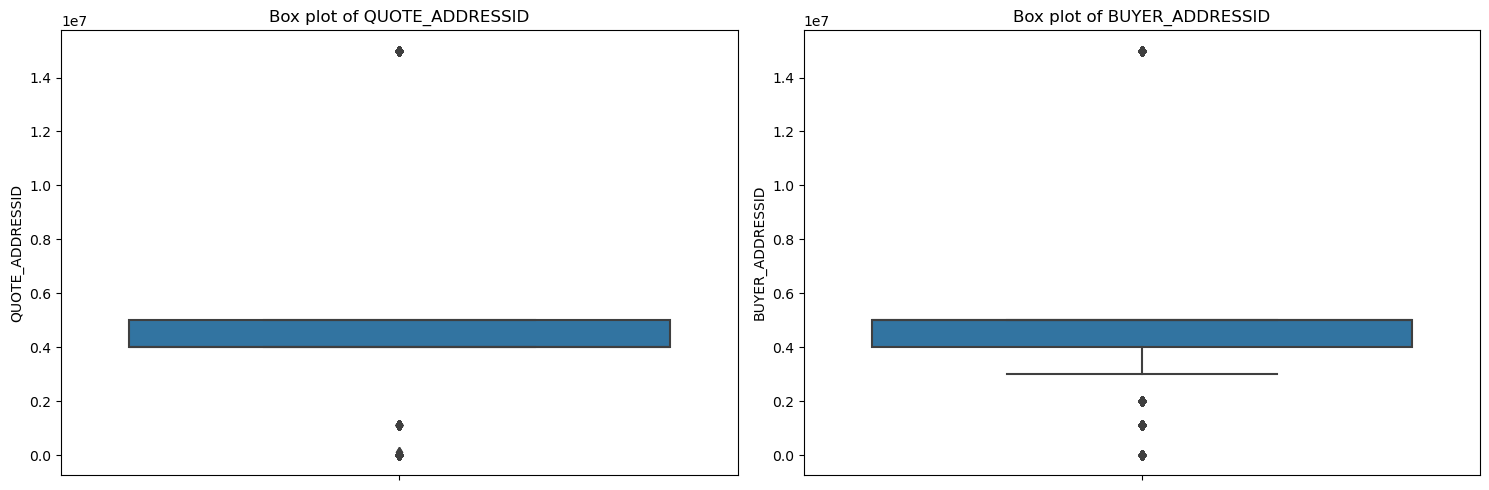

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['QUOTE_ADDRESSID', 'BUYER_ADDRESSID']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df_vendor[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [29]:
# Removing outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_vendor_cleaned = df_vendor.copy()
for column in numerical_columns:
    df_vendor_cleaned = remove_outliers(df_vendor_cleaned, column)

print(f"Original shape: {df_vendor.shape}")
print(f"Shape after removing outliers: {df_vendor_cleaned.shape}")

Original shape: (443698, 10)
Shape after removing outliers: (341136, 10)


#### KEY PERFORMANCE INDICATORS ( DF_VENDOR_CLEANED )

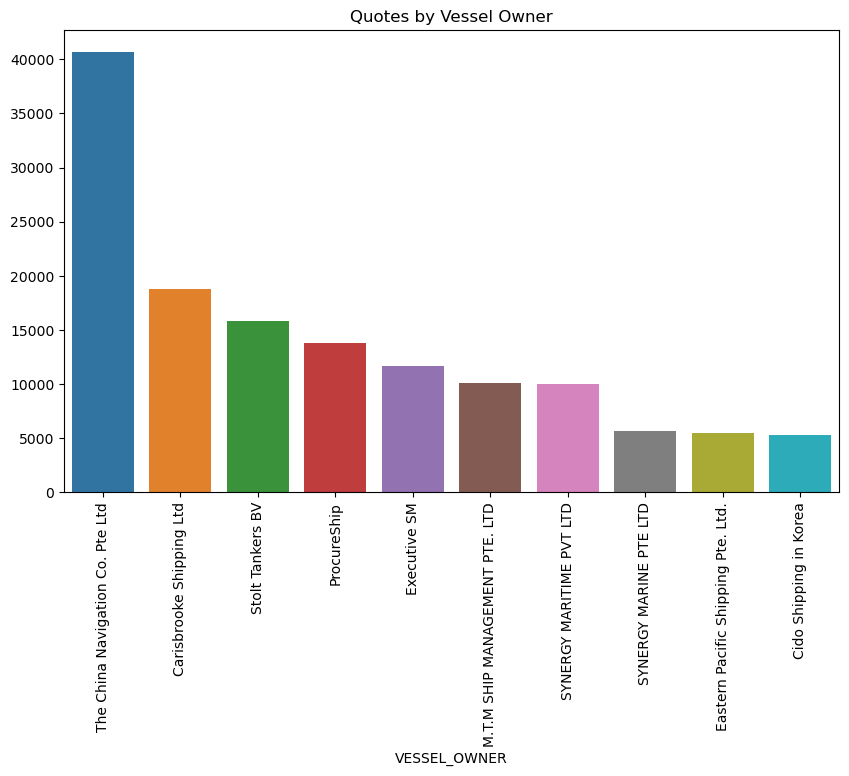

In [31]:
# Quotes by Vessel Owner
quotes_by_vessel_owner = df_vendor_cleaned['VESSEL_OWNER'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=quotes_by_vessel_owner.index, y=quotes_by_vessel_owner.values)
plt.title('Quotes by Vessel Owner')
plt.xticks(rotation=90)
plt.show()

### DF_DETAIL DATAFRAME

#### EDA OF DF_DETAIL

In [32]:
df_detail.isnull().sum()

QUOTATIONDETAILID               0
QUOTATIONID                     1
ITEMSTATUS                      0
ITEMNO                          1
VENDOR_ITEMNO                5489
QTY_REQ                         0
QTY_QUOTED                      0
QTY_ORD                     25918
QUOTED_PRICE                   57
QUOTE_EXCHRATE              25917
DISCOUNT                     9234
DELIVERYTIME                 6202
PARTNAME                        2
DRAWINGNO                   34177
POSNO                       34199
REFNO                       27950
UNIT_CODE                     382
EQUIP_NAME                  33031
EQUIP_MAKER                 33520
EQUIP_TYPE                  33935
EQUIP_SERNO                 27019
EQUIP_REMARKS               27136
QUOTEITEM_REMARK            32675
ITEM_REMARK                 30940
UPDATE_DATE                 25923
CREATED_DATE                25923
CHANGED_BY_VENDOR            7938
SITEID                      34199
DOCITEMID                   25920
QUOTE_FILE    

In [33]:
drop1 = ['ITEMSTATUS','VENDOR_ITEMNO','QUOTE_EXCHRATE','DRAWINGNO','POSNO','EQUIP_REMARKS','QUOTEITEM_REMARK','QUOTE_FILE','DELIVERYTIME','SYS_ITEMNO','CHANGED_BY_VENDOR',
         'REFNO','EQUIP_SERNO','EQUIP_NAME','EQUIP_TYPE','EQUIP_MAKER','ITEM_REMARK','UPDATE_DATE','DOCITEMID','SITEID','ORIGINATINGSYSTEMREF','ITEM_MARKED_REMARK',
         'ITEM_TYPE','UDF1','UDF2','UDF3','SupplierORGRef','VENDOR_ITEMNAME','BuyerORGRef','REFERENCE_NO','ExternalItemNumber','IMPA','ISSA','ITEM_PACKET_SIZE',
         'DEPARTMENT','TAX_AMOUNT','BYR_ORIGINATINGSYSTEMREF','Buyer_Price','EQUIP_MODEL','IsHazardous','LINK_RECORD_ID','VENDOR_REFNO','QUOTATIONDETAILID']
df_detail = df_detail.drop(columns=drop1)

In [34]:
df_detail['QUOTATIONID'] = df_detail['QUOTATIONID'].fillna(-1).astype(int)   #fill NaN -> -1 and convert to int type

In [35]:
df_detail['CREATED_DATE'] = df_detail['CREATED_DATE'].replace('', np.nan)
df_detail.dropna(subset=['CREATED_DATE'], inplace=True)
df_detail['CREATE_DATE'] = df_detail['CREATED_DATE'].dt.date
df_detail['CREATE_TIME'] = df_detail['CREATED_DATE'].dt.strftime('%H:%M:%S')
df_detail.drop(columns=['CREATED_DATE'], inplace=True)
df_detail['CREATE_DATE'] = pd.to_datetime(df_detail['CREATE_DATE'], errors='coerce')

In [36]:
df_detail['QUOTED_PRICE'] = pd.to_numeric(df_detail['QUOTED_PRICE'], errors='coerce')

In [37]:
df_detail.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,PARTNAME,UNIT_CODE,BUYER_UNIT_CODE,CREATE_DATE,CREATE_TIME
0,11879966,1.0,3.0,3.0,0.0,1360.0,70.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",PCS,PCS,2021-08-20,15:10:02
1,11879966,2.0,2.0,50.0,0.0,45.1,65.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",LTR,PAL,2021-08-20,15:10:02
2,11879966,3.0,1.0,25.0,0.0,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02
3,11879966,4.0,4.0,100.0,0.0,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02
4,11879966,5.0,1.0,1.0,0.0,235.0,42.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",PCS,CRT,2021-08-20,15:10:02


#### OUTLIER REMOVAL

In [38]:
df_detail.dropna(subset=['QUOTED_PRICE'], inplace=True)
df_detail.dropna(subset=['QTY_ORD'], inplace=True)

In [39]:
df_detail.shape

(8218, 12)

In [40]:
df_detail.describe()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,CREATE_DATE
count,8.218000e+03,8218.000000,8218.000000,8218.000000,8218.000000,8218.000000,8124.000000,8218
mean,1.187967e+07,42.348868,26.077692,27.217507,3.615049,368.119765,2.502256,2021-11-17 11:40:54.027744
min,1.168798e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-08-02 00:00:00
25%,1.187973e+07,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2021-02-02 00:00:00
50%,1.187987e+07,22.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2021-06-22 00:00:00
75%,1.188001e+07,67.000000,20.000000,20.000000,0.000000,0.000000,0.000000,2022-07-21 00:00:00
max,1.188117e+07,220.000000,4000.000000,4000.000000,300.000000,278550.000000,79.470000,2024-03-05 00:00:00
std,5.192109e+03,46.170922,82.218124,82.618498,18.280990,7823.263501,10.951785,NaN


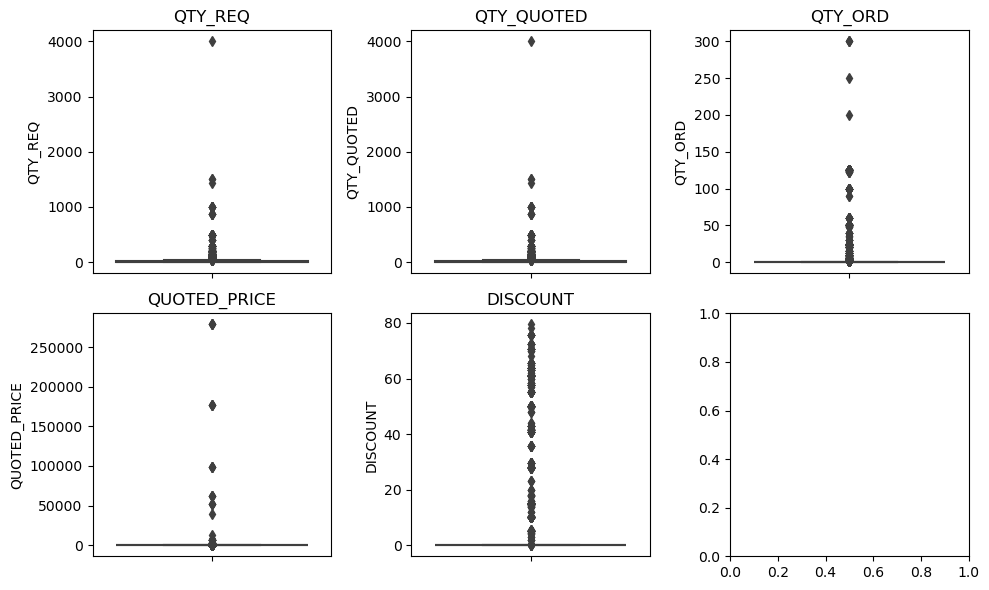

In [41]:
numerical_column = ['QTY_REQ', 'QTY_QUOTED', 'QTY_ORD', 'QUOTED_PRICE', 'DISCOUNT']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_column):
    sns.boxplot(y=df_detail[column], ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

numerical_columns = ['QTY_REQ', 'QTY_QUOTED', 'QTY_ORD', 'QUOTED_PRICE', 'DISCOUNT']

def fill_qty_ord_ml(df):
    imputer = SimpleImputer(strategy='median')
    df['QTY_ORD'] = imputer.fit_transform(df[['QTY_ORD']])
    X = df[['QTY_REQ', 'QTY_QUOTED']] 
    y = df['QTY_ORD'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    X_pred = df.loc[df['QTY_ORD'] == 0, ['QTY_REQ', 'QTY_QUOTED']]
    y_pred = model.predict(X_pred)
    df.loc[df['QTY_ORD'] == 0, 'QTY_ORD'] = y_pred    
    return df

df_detail_cleaned = fill_qty_ord_ml(df_detail.copy())

In [43]:
def fill_quoted_price(df):
    avg_quoted_price_per_unit = df.loc[(df['QUOTED_PRICE'] > 0) & (df['QTY_ORD'] > 0), 'QUOTED_PRICE'].sum() / \
                                df.loc[(df['QUOTED_PRICE'] > 0) & (df['QTY_ORD'] > 0), 'QTY_ORD'].sum()

    mask = (df['QUOTED_PRICE'] == 0) & (df['QTY_ORD'] != 0)
    df.loc[mask, 'QUOTED_PRICE'] = df.loc[mask, 'QTY_ORD'] * avg_quoted_price_per_unit
    return df

df_detail_cleaned = fill_quoted_price(df_detail_cleaned)

In [44]:
df_detail_cleaned['QUOTED_PRICE'].value_counts()

QUOTED_PRICE
261.714964    985
265.378899    731
294.690380    654
313.010056    525
302.018251    369
             ... 
181.230000      1
41.100000       1
17.001400       1
190.150000      1
9.800000        1
Name: count, Length: 501, dtype: int64

In [45]:
df_detail_cleaned.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,PARTNAME,UNIT_CODE,BUYER_UNIT_CODE,CREATE_DATE,CREATE_TIME
0,11879966,1.0,3.0,3.0,2.811211,1360.0,70.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",PCS,PCS,2021-08-20,15:10:02
1,11879966,2.0,2.0,50.0,2.837615,45.1,65.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",LTR,PAL,2021-08-20,15:10:02
2,11879966,3.0,1.0,25.0,2.766986,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02
3,11879966,4.0,4.0,100.0,2.978871,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02
4,11879966,5.0,1.0,1.0,2.734642,235.0,42.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",PCS,CRT,2021-08-20,15:10:02


#### KEY PERFORMANCE INDICATORS ( DF_DETAIL_CLEANED )

In [46]:
quotation_success_rate = (df_detail_cleaned['QTY_ORD'].sum() / df_detail_cleaned['QTY_QUOTED'].sum()) * 100

average_quoted_price = df_detail_cleaned['QUOTED_PRICE'].mean()

total_discount_given = df_detail_cleaned['DISCOUNT'].sum()

average_discount_percentage = df_detail_cleaned['DISCOUNT'].mean()

print(f"Quotation Success Rate: {quotation_success_rate:.2f}%")
print(f"Average Quoted Price: {average_quoted_price:.2f}")
print(f"Total Discount Given: {total_discount_given:.2f}")
print(f"Average Discount Percentage: {average_discount_percentage:.2f}%")

Quotation Success Rate: 24.82%
Average Quoted Price: 646.64
Total Discount Given: 20328.33
Average Discount Percentage: 2.50%


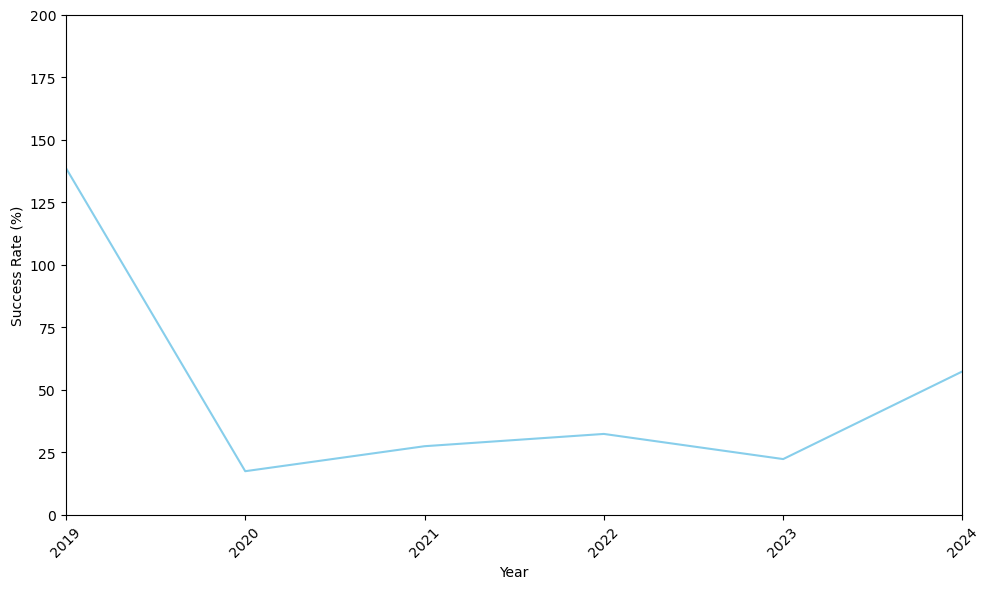

In [47]:
df_detail_cleaned['Year'] = df_detail_cleaned['CREATE_DATE'].dt.to_period('Y')

yearly_data = df_detail_cleaned.groupby('Year').agg({
    'QTY_ORD': 'sum',
    'QTY_QUOTED': 'sum'
})

yearly_data['Success Rate'] = (yearly_data['QTY_ORD'] / yearly_data['QTY_QUOTED']) * 100

plt.figure(figsize=(10, 6))
yearly_data['Success Rate'].plot(kind='line', color='skyblue')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 200)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>We can draw inference from the year 2022 dataset to obtain insights!

In [48]:
df_detail_cleaned.describe()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,CREATE_DATE
count,8.218000e+03,8218.000000,8218.000000,8218.000000,8218.000000,8218.000000,8124.000000,8218
mean,1.187967e+07,42.348868,26.077692,27.217507,6.756735,646.643550,2.502256,2021-11-17 11:40:54.027744
min,1.168798e+07,1.000000,0.000000,0.000000,1.000000,0.010000,0.000000,2019-08-02 00:00:00
25%,1.187973e+07,6.000000,2.000000,2.000000,2.772926,261.714964,0.000000,2021-02-02 00:00:00
50%,1.187987e+07,22.000000,6.000000,6.000000,3.000000,272.706769,0.000000,2021-06-22 00:00:00
75%,1.188001e+07,67.000000,20.000000,20.000000,3.615179,313.010056,0.000000,2022-07-21 00:00:00
max,1.188117e+07,220.000000,4000.000000,4000.000000,300.000000,278550.000000,79.470000,2024-03-05 00:00:00
std,5.192109e+03,46.170922,82.218124,82.618498,17.966412,7817.279006,10.951785,NaN


### MERGE DATAFRAME

#### MERGING TABLES : DF_VENDOR, DF_DETAIL

In [49]:
merge = pd.merge(df_detail_cleaned, df_vendor_cleaned, on='QUOTATIONID', how='inner')

In [50]:
merge.shape

(2371, 22)

In [51]:
merge.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,PARTNAME,UNIT_CODE,BUYER_UNIT_CODE,CREATE_DATE_x,CREATE_TIME_x,Year,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,CREATE_DATE_y,CREATE_TIME_y
0,11879966,1.0,3.0,3.0,2.811211,1360.0,70.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",PCS,PCS,2021-08-20,15:10:02,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19,16:54:40
1,11879966,2.0,2.0,50.0,2.837615,45.1,65.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",LTR,PAL,2021-08-20,15:10:02,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19,16:54:40
2,11879966,3.0,1.0,25.0,2.766986,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19,16:54:40
3,11879966,4.0,4.0,100.0,2.978871,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",LTR,PCS,2021-08-20,15:10:02,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19,16:54:40
4,11879966,5.0,1.0,1.0,2.734642,235.0,42.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",PCS,CRT,2021-08-20,15:10:02,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,2022-01-19,16:54:40


In [52]:
drop = ['CREATE_TIME_x','CREATE_DATE_y','CREATE_TIME_y','UNIT_CODE']
merge = merge.drop(columns=drop)

## BUSINESS REQUIREMENTS

#### TIME SERIES ANALYSIS
* Are there seasonal patterns in quoted prices (QUOTED_PRICE) over time?
* How does the volume of quotations (QUOTATIONID) vary month-to-month or quarter-to-quarter?

In [53]:
merge['Month'] = df_detail['CREATE_DATE'].dt.month
merge['Year'] = df_detail['CREATE_DATE'].dt.year

In [54]:
merge.dropna(subset=['Month'], inplace=True)
merge['Month'] = merge['Month'].astype(int)

In [55]:
merge.dropna(subset=['Year'], inplace=True)
merge['Year'] = merge['Year'].astype(int)

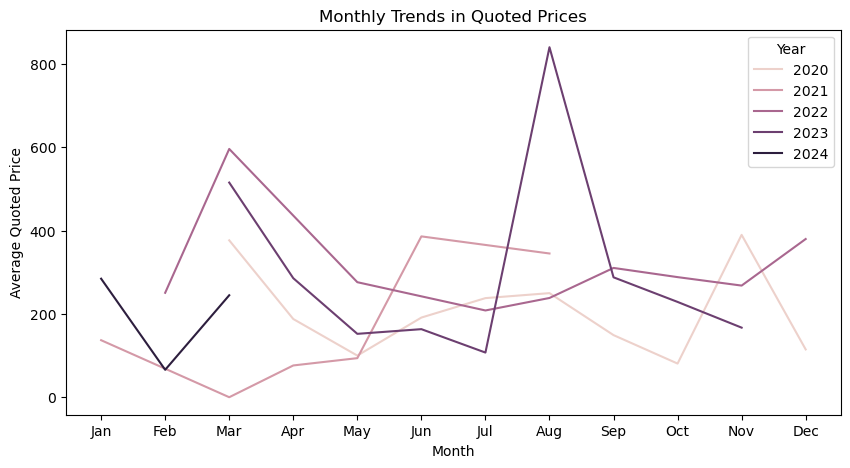

In [56]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 5))
sns.lineplot(data=merge, x='Month', y='QUOTED_PRICE', hue='Year', err_style=None)
plt.title('Monthly Trends in Quoted Prices')
plt.xlabel('Month')
plt.ylabel('Average Quoted Price')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

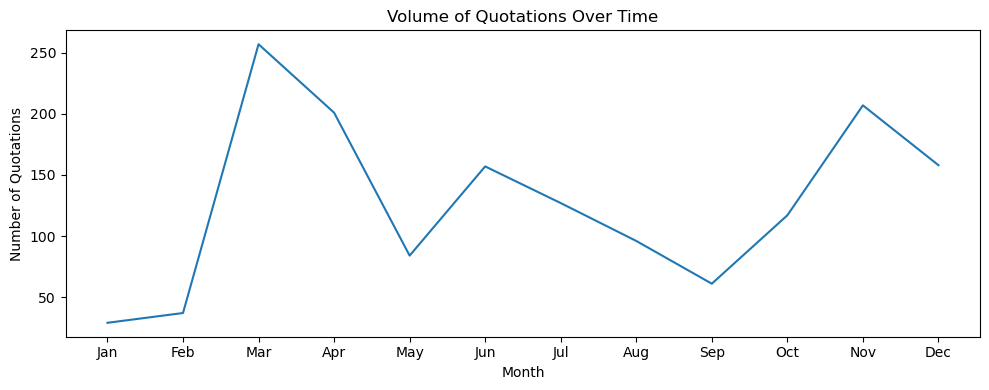

In [57]:
quotations_per_month = merge.groupby('Month')['QUOTATIONID'].count()

plt.figure(figsize=(10, 4))
quotations_per_month.plot()
plt.title('Volume of Quotations Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Quotations')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

#### COST FORECASTING
* Can we forecast future quoted prices based on historical trends and vendor data?

In [58]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = merge[['CREATE_DATE_x', 'QUOTED_PRICE']].rename(columns={'CREATE_DATE_x': 'ds', 'QUOTED_PRICE': 'y'})

# Display the prepared data
print(df_prophet.head())


          ds       y
0 2021-08-20  1360.0
1 2021-08-20    45.1
2 2021-08-20    42.9
3 2021-08-20    42.9
4 2021-08-20   235.0


In [59]:
model = Prophet()
model.fit(df_prophet)

10:10:38 - cmdstanpy - INFO - Chain [1] start processing
10:10:38 - cmdstanpy - INFO - Chain [1] done processing


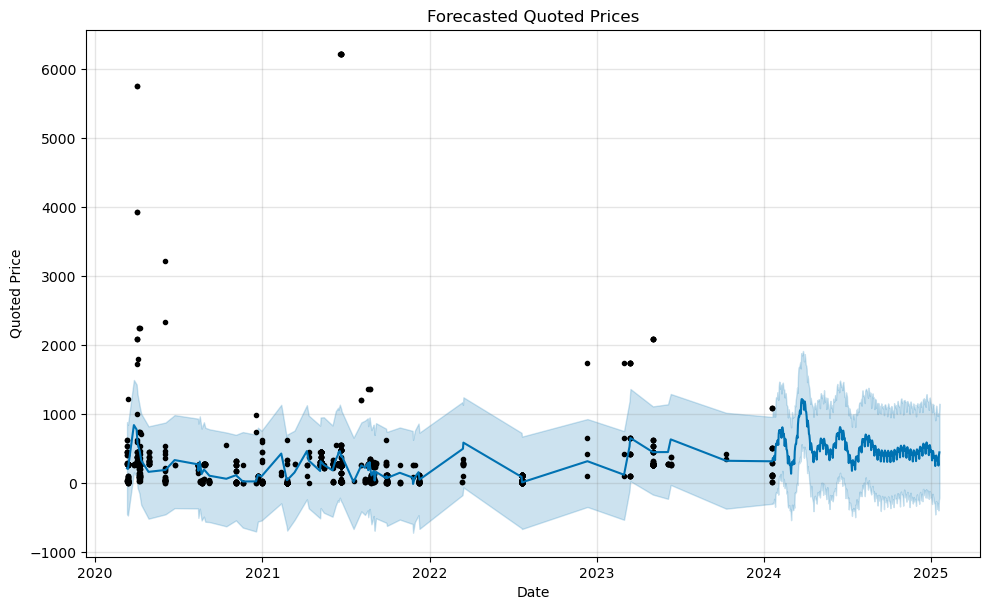

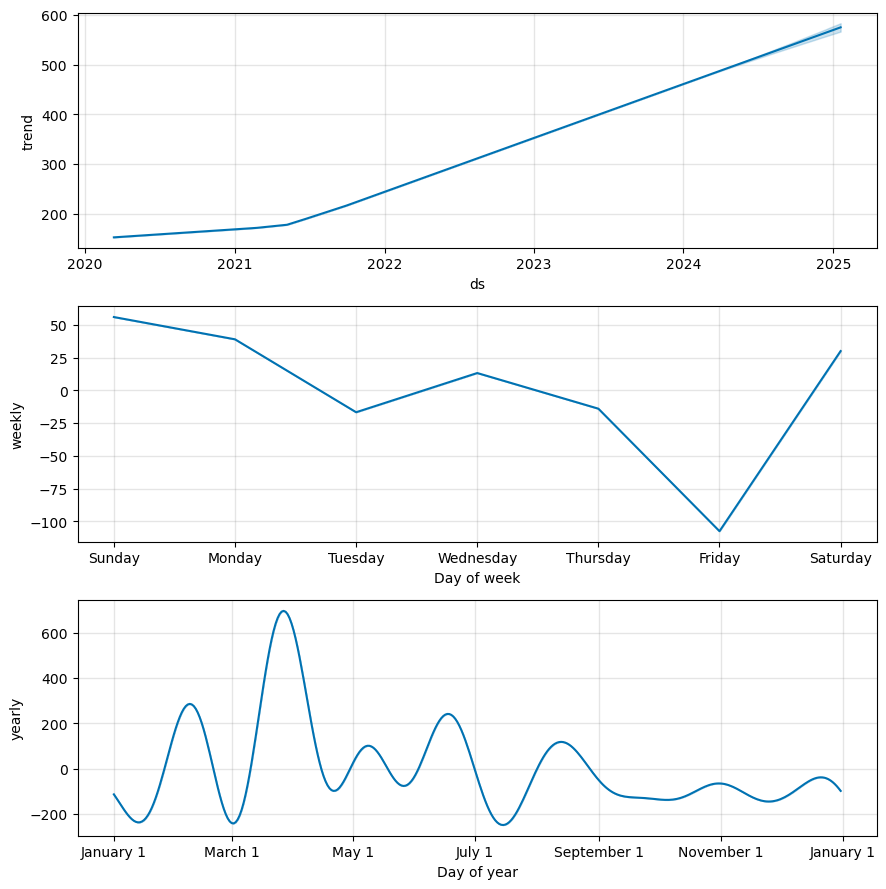

In [60]:
future_dates = model.make_future_dataframe(periods=365)  
forecast = model.predict(future_dates)

model.plot(forecast)
plt.title('Forecasted Quoted Prices')
plt.xlabel('Date')
plt.ylabel('Quoted Price')
plt.show()

model.plot_components(forecast)
plt.show()

In [61]:
merge.head()

,QUOTATIONID,ITEMNO,QTY_REQ,QTY_QUOTED,QTY_ORD,QUOTED_PRICE,DISCOUNT,PARTNAME,BUYER_UNIT_CODE,CREATE_DATE_x,Year,DOC_TYPE,QUOTE_ADDRESSID,BUYER_ADDRESSID,QUOTE_RECVD_DATE,CURR_CODE,QUOTE_EXCHRATE,VESSEL_OWNER,Month
0,11879966,1.0,3.0,3.0,2.811211,1360.0,70.0,"CHEMICALS,NALFLEET,COOL WATER TEST KIT, PART N...",PCS,2021-08-20,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,8
1,11879966,2.0,2.0,50.0,2.837615,45.1,65.0,"CHEMICALS,UNITOR,DISCLEAN,PART NO.571687",PAL,2021-08-20,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,8
2,11879966,3.0,1.0,25.0,2.766986,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",PCS,2021-08-20,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,8
3,11879966,4.0,4.0,100.0,2.978871,42.9,55.0,"ENVIRO CLEAN,CLEANER/DEGREASER (WATER BASED) P...",PCS,2021-08-20,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,8
4,11879966,5.0,1.0,1.0,2.734642,235.0,42.0,"WILHELMSEN SHIP SERVICES, LIQUID HAND SOAP, EA...",CRT,2021-08-20,2021,Quote,4001051,5000044,2021-08-20,AED,0.2717,PACIFIC INTERNATIONAL LINES (PTE) LTD,8


#### DEMAND FORECASTING
* How can historical quotation data help in forecasting future demand?

10:10:39 - cmdstanpy - INFO - Chain [1] start processing
10:10:40 - cmdstanpy - INFO - Chain [1] done processing


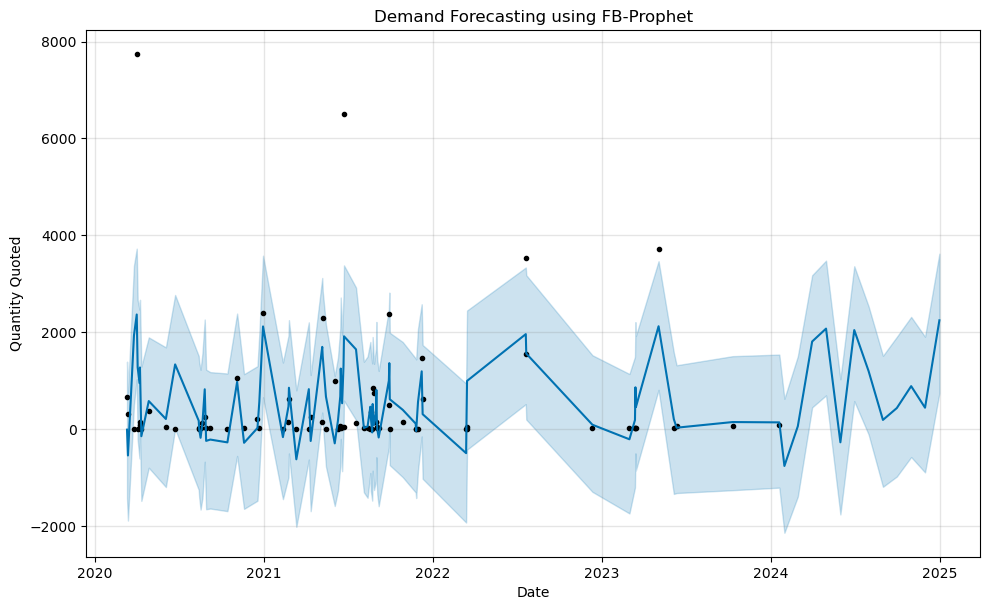

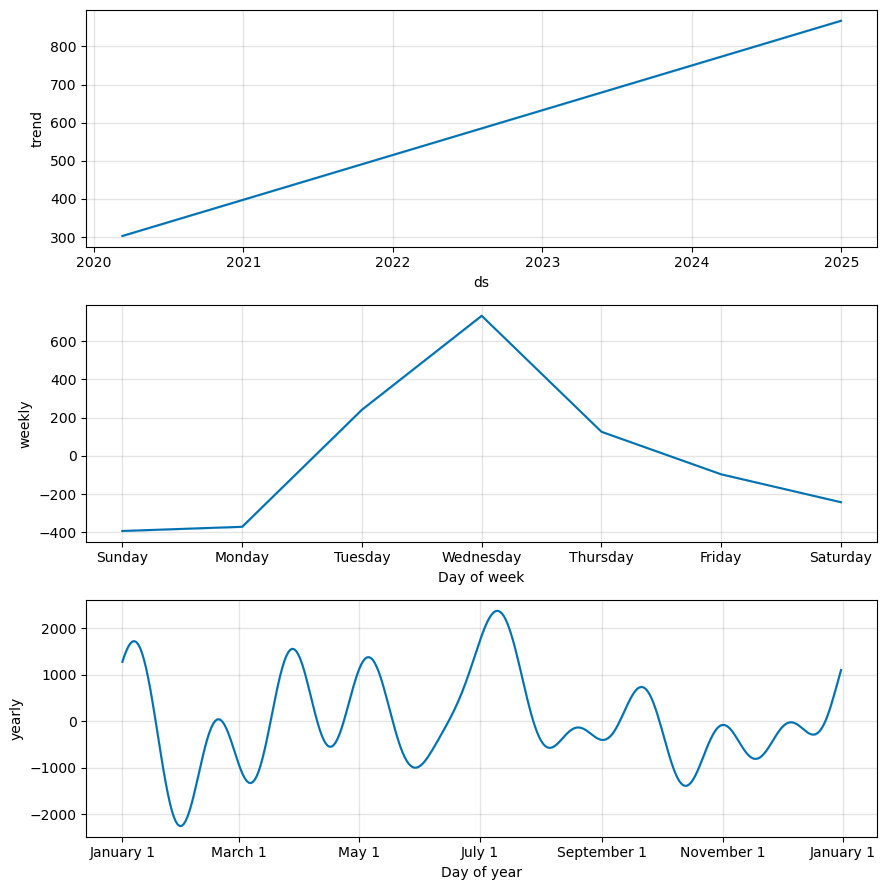

In [62]:
demand_data = merge.groupby('CREATE_DATE_x')['QTY_QUOTED'].sum().reset_index()

demand_data.rename(columns={'CREATE_DATE_x': 'ds', 'QTY_QUOTED': 'y'}, inplace=True)

model = Prophet()
model.fit(demand_data)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Demand Forecasting using FB-Prophet')
plt.xlabel('Date')
plt.ylabel('Quantity Quoted')
plt.grid(True)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

#### RISK ASSESSMENT

* How do fluctuations in quoted prices and exchange rates affect financial risk?

In [63]:
merge['TotalRevenue'] = merge['QUOTED_PRICE'] * merge['QTY_ORD']

# Calculate the impact of fluctuating prices on profitability
average_price = merge['QUOTED_PRICE'].mean()
max_price = merge['QUOTED_PRICE'].max()
min_price = merge['QUOTED_PRICE'].min()

print(f"Average quoted price: {average_price}")
print(f"Maximum quoted price: {max_price}")
print(f"Minimum quoted price: {min_price}")

average_exchange_rate = merge['QUOTE_EXCHRATE'].mean()
print(f"Average exchange rate (x): {average_exchange_rate}")

Average quoted price: 265.7553686060231
Maximum quoted price: 6216.0
Minimum quoted price: 0.01
Average exchange rate (x): 0.9549665705923175


In [64]:
std_price = merge['QUOTED_PRICE'].std()
std_exchange_rate = merge['QUOTE_EXCHRATE'].std()

print(f"Standard deviation of quoted prices: {std_price}")
print(f"Standard deviation of exchange rates: {std_exchange_rate}")

Standard deviation of quoted prices: 547.9928129674122
Standard deviation of exchange rates: 0.2014975108161511


In [65]:
correlation_price_exchange = merge['QUOTED_PRICE'].corr(merge['QUOTE_EXCHRATE'])
print(f"Correlation between quoted prices and exchange rates: {correlation_price_exchange}")

Correlation between quoted prices and exchange rates: -0.2786750271793034


In [66]:
#import pickle
#with open('seaport_model.pickle','wb') as f:
#    pickle.dump(lr_clf,f)

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

NameError: name 'X' is not defined